In [3]:
import os
import sys
import re
import string
import datetime
import time
import numpy as np
import matplotlib as mptl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy import *
from datetime import timedelta
from datetime import datetime
from matplotlib.pyplot import grid, figure, plot, savefig
from time import gmtime, strftime
import pandas as pd
import math
#END OF HEADER

In [312]:
timeArr=[]
arrF=[]
arrS=[]
arrSvs=[]
test=[]
filename =   os.path.basename('KAZA2020501.20o')
#filename =   os.path.basename('KAZA200502.20o')
#KAZA1420.20O
#print(filename1)
file1 = open (filename)
allLines = file1.readlines()
file1linecount = len(allLines)
file1.seek(0) # peremestit ukozatel v nachal

for ln in range(file1linecount) :#3700 strok все строки
    # read equivalent lines from 2 or 3 files, at index ln (line number); 0 base
    line  = file1.readline()
    #print(line)
    #line  = file1.readline()
   
    #re.findall(r'G..|R..', param)END OF HEADER
  
    if ln==15:
        times = (line[4:24])
        #print(line)
        times=times.replace("    ", " ")
        times=times.replace("   ", " ")
        times=times.replace("  ", " ")
        times = times.replace(" ", " ")
        times=times.strip()
        times= times.split(" ")
        #print(times)
        timeArr = times
    if ln >= 17 :
        param=line.strip() #str
        
#        print(line)
#        print('-------------------------')

        #print(paramtimeSvs = np.array(timeSvs,dtype=object))
    #    r = re.split(r'G', line)
        #print(param)                        #G28G17G12G24G 6G 2
        result = re.findall(r'G..|R..', param)# ищим G любые симв и R люб символы        # type list
        

        if result :  #
            #result = re.sub('\s', '', result)# est probeli 
            arrSvs.append(result)#[['G16', 'G23', 'G 6', 'G 9', 'G 4', 'G22', 'G 3', 'G26', 'G14', 'G31'], ['G16', 'G2....]]
            #time.sleep(0.5)
        else:
            #109723767.5854 8  85499045.2474 7    109723767.58548  85499045.24747      type STR
            res = re.sub('\s\w\s', '7', param)#zamena otshipaih jstatkov na 7
            res=res.replace(" ", ";")#Замена пробелоа на ; для видимости
    ###########   Problem chto ne odinak kol probelov megdu dannimi #################
            # в данном случае{ L1, нет L2, C1,нет P1, нет P2 возможно будет что есть L2? ytn C1 
            res=res.replace(';;;;;;;;;;;;;;;;;;;',"::")#между L1  и C1 19 пробелов
            res=res.replace(";;;;;;;;;;;;;;;;;;", "::")#7660
            res=res.replace(";;;;;;;;;;;;;;;;;", "::")
            res=res.replace(";;;;;;;;;;;;;;;;", "::")
            res=res.replace(";;;;;;;;;;;;;;;", "::")
            ###### Пробелы между данными которые есть но пробелы разные(5+2 параметров есть
            res=res.replace(";;;;;;;;;;", ";")
            res=res.replace(";;;;;", ";")
            res=res.replace(";;;;", ";")
            res=res.replace(";;;", ";")
            res=res.replace(";;", ";")
            res=res.replace("::", ";NaN;")
            
            res= res.split(";")  #          Type list
            #param = list(map(float, param))
            test.append(res)



In [313]:
#print(len(arrSvs))
#print(len(test))
voln=[]
SVS=[]
for x in range(len(test)):# chetni stroki popadat 5 parametrov(L1,L2,C,P2) eshe 2 poslednie 2 parametra s1 s2 signal shum
    if x%2==0:
        #print(len(test[x]))
        voln.append(test[x])
################################# svs ame time epoch #################

epoch=[]
t=0
##arrSvs ==[['G16', 'G23', 'G6', 'G9', 'G4', 'G22', 'G3', 'G26', 'G14', 'G31'], ['G16', 'G2....]]
for i in range(len(arrSvs)):#  SVS epoch columns

    for ii in range(len(arrSvs[i])):
  
        arrSvs[i][ii] = re.sub('\s', '', arrSvs[i][ii])# udalit probel probel G 1   G1  G 4  G4(krivo nazvani sputniki)
        SVS.append(arrSvs[i][ii])
        epoch.append(t) # massiv po 30 sec
        #SVS.append(arrSvs[i])
    t+=30         # ispolzuem vsegda v priemnike mogno brat s faila
    
#print(len(epoch))


In [328]:
arrF = np.array(voln,dtype=object)
arrS = np.array(SVS,dtype=object)
c_cons = 3e+5      # skorost sveta
#c_cons = 299792458
df = pd.DataFrame(voln, columns=['L1','L2','C1','P2'])
df.insert(loc=0, column="svs", value=arrS)
df.insert(loc=1, column="epoch", value=epoch)
#0	[G16, G23, G6, G9, G4, G22, G3, G26, G14, G31]	0	-18111043.99447	-14410721.63045	21401834.0314	21401826.2274
df.head(5)

,svs,epoch,L1,L2,C1,P2
0,G16,0,-18111043.99447,-14410721.63045,21401834.0314,21401826.2274
1,G23,0,-5295583.58247,-4434418.59144,23758758.9614,23758750.0594
2,G6,0,-605413.22045,-475255.65445,25210491.2424,25210486.3914
3,G9,0,-7275166.60146,-5647523.78346,23999567.5314,23999563.3984
4,G4,0,-21899870.48247,-17039794.08246,21337295.5084,21337289.1764


In [397]:
df = df.astype({'L1':'float','L2':'float','C1':'float','P2':'float'})# 2 VARIANT
df['beta']= (df['P2']-df['C1'])-(df['L1']-df['L2'])

df['ff']=(1575.43**2*1227.60**2)/(40.308*(1575.43**2-1227.60**2)) # kombinaciya chastot
#df['ff2']=(1575.43**2*1227.60**2)/((1575.43**2-1227.60**2)*40.308)
df['epoch_h']= (df['epoch']/3600)
df.dropna(inplace=True)
#df.head(150)

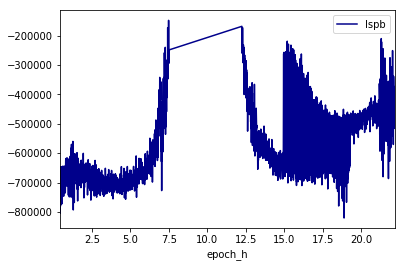

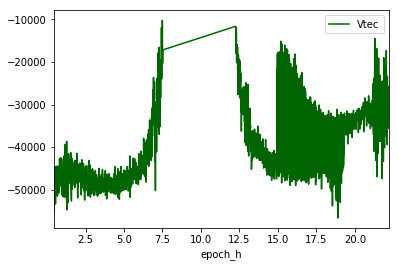

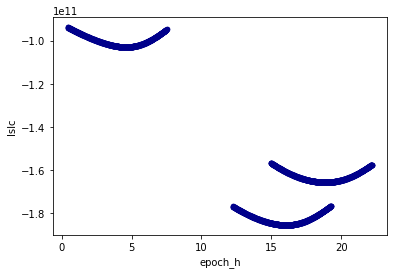

In [400]:


df['Ispb']= df['ff']*(df['P2']-df['C1'])   # prilomlinie koef  0.0248

df['Islc']= df['ff']*(df['L1']*19.04-df['L2']*24.43)# P.S. poprob ukaz v mm cm m
#df['Vtec']=df['Ispb']*(1-(6400*np.cos(80)/(6400+400)))#0.9782
df['Vtec']=df['Ispb']*((6400/(6400+400))*np.sin(90*0.9782))#0.9782
#df['Vtec2']=df['Islc']*np.cos(np.arctan(6400000*np.cos(80)/(6400000+350000)))
#df['Islc']= df['ff']*(df['L1']*19.04-df['L2']*24.43)# P.S. poprob ukaz v mm cm m
#ds = (df.loc[df['svs'] == 'G17' ])#18 #10 #7
ds =  df[df['svs'].isin(['G7','G10','G18'])]
#print(ds)
#ds = (df.loc[df['epoch_h'] == ''])
#ds = ds.loc[(ds['epoch_h'] >= 5) & (ds['epoch_h'] < 11)]# c 6 часа по 8 угол 80
#print(ds)

#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']-df['L2'])
#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']*(c_cons/1575.43)-df['L2']*(c_cons/1227.60))

#print(df.dtypes)
#ds = (df.loc[df['svs'] == 'G6'])

ds.plot(x='epoch_h',y='Ispb',c='DarkBlue')
ds.plot(x='epoch_h',y='Vtec',c='DarkGreen')
#ds.plot.scatter(x='epoch_h',y='beta',c='DarkGreen')
ds.plot.scatter(x='epoch_h',y='Islc',c='DarkBlue')

#ds.plot.scatter(x='epoch_h',y='Vtec2',c='DarkGreen')
#ds.plot.scatter(x='epoch_h',y='CrIslc',c='DarkRed')

plt.show()